In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from mpl_toolkits import mplot3d

/home/riku/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Define data
X_train = pd.read_csv('weather_data_train.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
X_test = pd.read_csv('weather_data_test.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_train = pd.read_csv('weather_data_train_labels.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_test = pd.read_csv('weather_data_test_labels.csv', index_col='datetime',
                      sep=';', decimal=',', infer_datetime_format=True)
y_train_lin = y_train['U_mu']
y_train_log = y_train['OBSERVED']
y_test_lin = y_test['U_mu']
y_test_log = y_test['OBSERVED']


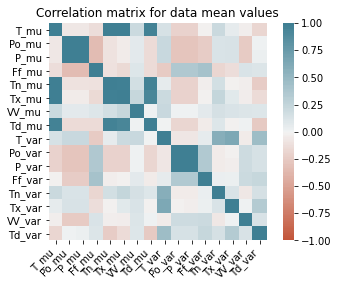

In [3]:
# Plot correlation matrix of the mean values to show strength and
# direction of the linear relationship between two variables
corr = X_train.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation matrix for data mean values')
plt.show()

In [4]:
# Prepare data for PCA (Principal component Analysis)
# for dimension reduction 
train_values = X_train.values
# Scale the data
scaler = StandardScaler()
train_values_scaled = scaler.fit_transform(train_values)

In [5]:
# PCA with all 16 components
pca_16 = PCA(n_components=16)
pca_16.fit(train_values_scaled)

PCA(n_components=16)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

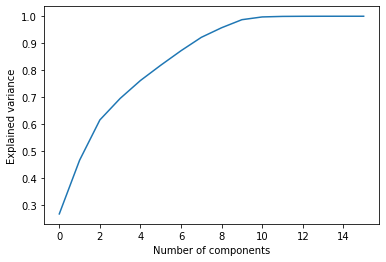

In [6]:
# Plot PCA analysis
plt.plot(np.cumsum(pca_16.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.plot

In [7]:
# Print PCA results 
print("Variance explained by: \n")
print("The sixth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[5])
print("The seventh principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[6])
print("The eighth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[7])
print("The ninth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[8])
print("The tenth principal component:", np.cumsum(pca_16.explained_variance_ratio_*100)[9])

Variance explained by: 

The sixth principal component: 81.87234745577402
The seventh principal component: 87.24842193446986
The eighth principal component: 92.19592759796305
The ninth principal component: 95.74844420579845
The tenth principal component: 98.72476986777771


In [8]:
# We can see that 8 principal components keep over 92% of the 
# variability in the dataset while reducing 8 features in the dataset
# the remaining 8 features only contain less than 8% of the variability
# in data

In [9]:
# Lets reduce the training data accordingly to only use 8
# principal components
pca_8 = PCA(n_components=8)
X_train_8 = pca_8.fit_transform(train_values_scaled)

Text(0.5, 1.0, 'Transformed data by the principal components (90% variability)')

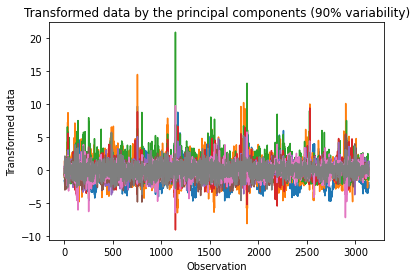

In [10]:
# Plot the data
plt.plot(X_train_8)
plt.xlabel('Observation')
plt.ylabel('Transformed data')
plt.title('Transformed data by the principal components (90% variability)')

In [11]:
test_values = X_test.values
# Scale the data
test_values_scaled = scaler.transform(test_values)
# Apply PCA
X_test_8 = pca_8.transform(test_values_scaled)

In [12]:
# Predict future humidity using Linear Regression
# and the 8 principal components

# Set up model
reg = LinearRegression()
# Fit data 
reg.fit(X_train_8, y_train_lin)
# Make a prediction
y_prediction = reg.predict(X_test_8)
# Show MSE and r2_score error
print(mean_squared_error(y_test_lin, y_prediction))
print(r2_score(y_test_lin, y_prediction))

71.01218243883373
0.5613127477395561


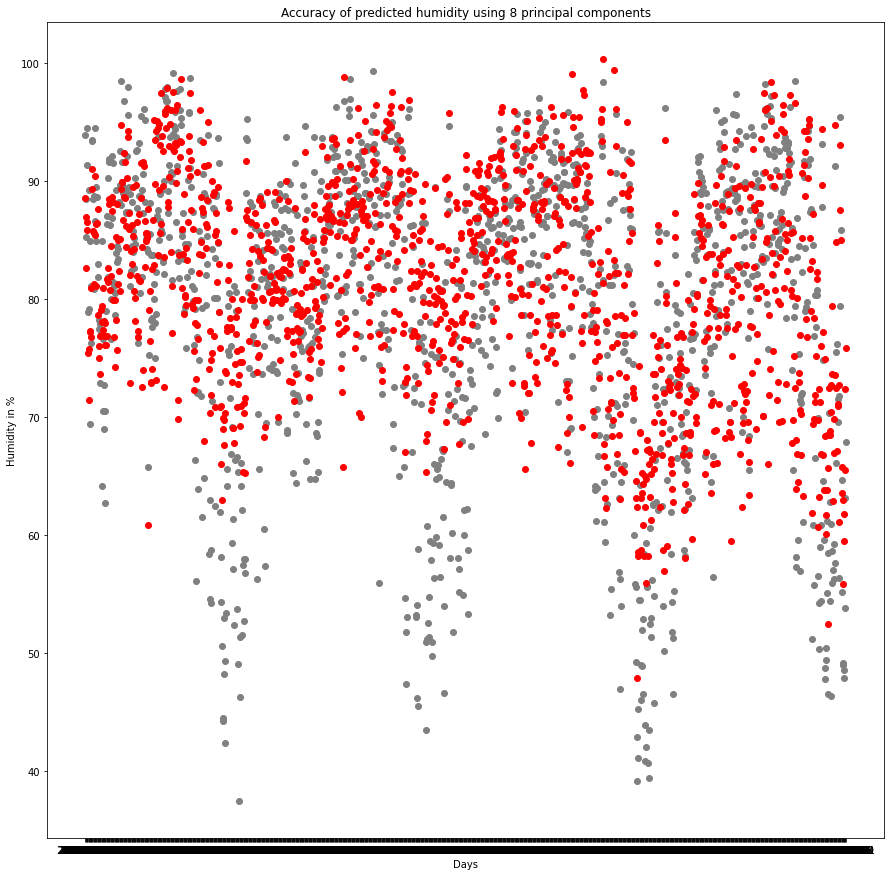

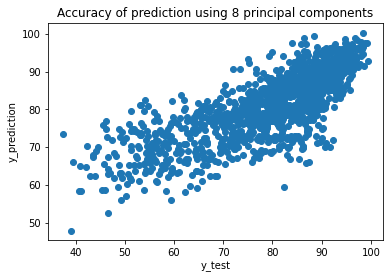

In [13]:
#defining the scatterplot for the predicted and actual humidity
plt.figure(figsize=(15,15))
plt.title('Accuracy of predicted humidity using 8 principal components')
plt.ylabel('Humidity in %')
plt.xlabel('Days')
plt.scatter(X_test.index, y_test_lin,  color='gray')
plt.scatter(X_test.index, y_prediction, color='red')
plt.show()

#plotting the accuracy of the prediction
plt.title('Accuracy of prediction using 8 principal components')
plt.ylabel('y_prediction')
plt.xlabel('y_test')
plt.scatter(y_test_lin, y_prediction)
plt.show()

In [14]:
# Optimally the second graph should show linear results
# Lets increase the number of primary components to 12
# Apply PCA
pca_12 = PCA(n_components=12)
X_train_12 = pca_12.fit_transform(train_values_scaled)
X_test_12 = pca_12.transform(test_values_scaled)

In [15]:
# Fit new data
reg.fit(X_train_12, y_train_lin)
# Make a prediction
y_pred_12 = reg.predict(X_test_12)
# Show MSE and r2_score error
print(mean_squared_error(y_test_lin, y_pred_12))
print(r2_score(y_test_lin, y_pred_12))

4.266165195530122
0.9736451940633105


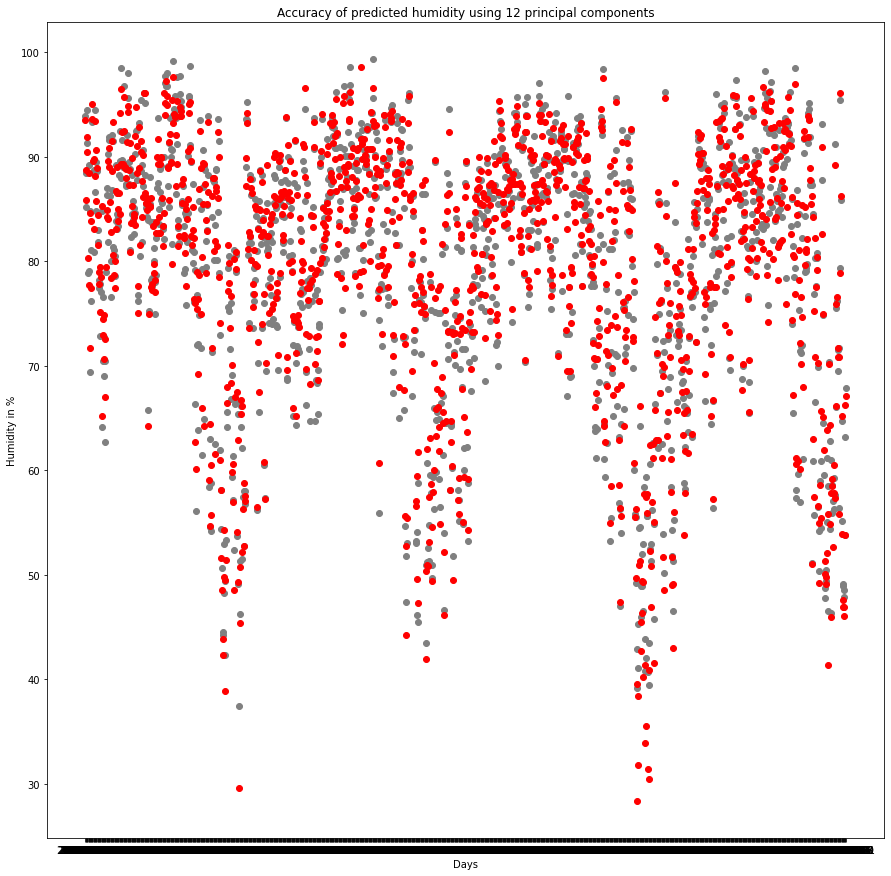

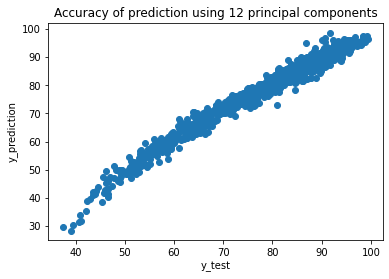

In [16]:
# Much improved mean_squared_error
# Plot new results
plt.figure(figsize=(15,15))
plt.title('Accuracy of predicted humidity using 12 principal components')
plt.ylabel('Humidity in %')
plt.xlabel('Days')
plt.scatter(X_test.index, y_test_lin,  color='gray')
plt.scatter(X_test.index, y_pred_12, color='red')
plt.show()

#plotting the accuracy of the prediction
plt.title('Accuracy of prediction using 12 principal components')
plt.ylabel('y_prediction')
plt.xlabel('y_test')
plt.scatter(y_test_lin, y_pred_12)
plt.show()

In [17]:
# Clearly the accuracy has been improved

In [18]:
# Lets apply LogisticRegression to determine whether it will rain or not
classifier = LogisticRegression(random_state=0, max_iter=1200)
classifier.fit(X_train_12, y_train_log)

LogisticRegression(max_iter=1200, random_state=0)

In [19]:
y_pred_log = classifier.predict(X_test_12)
cm = confusion_matrix(y_test_log, y_pred_log)
print(cm)
print(classification_report(y_test_log, y_pred_log))

[[305 123]
 [161 757]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       428
           1       0.86      0.82      0.84       918

    accuracy                           0.79      1346
   macro avg       0.76      0.77      0.76      1346
weighted avg       0.79      0.79      0.79      1346



In [20]:
# 79% Accuracy is ok